### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv(r'C:\Users\payam\OneDrive\Desktop\assignment5_1\data\coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [15]:
rows_with_missing = data[data.isna().any(axis=1)] 
print(rows_with_missing)


           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

3. Decide what to do about your missing data -- drop, replace, other...

In [17]:
# Car has a lot of empty cells and hence removing the Car column completely
data = data.drop('car', axis=1)
data = data.dropna() #Removing other rows with null data values

print(data.head())
print(data.info())


        destination  passanger weather  temperature  time  \
22  No Urgent Place      Alone   Sunny           55   2PM   
23  No Urgent Place  Friend(s)   Sunny           80  10AM   
24  No Urgent Place  Friend(s)   Sunny           80  10AM   
25  No Urgent Place  Friend(s)   Sunny           80  10AM   
26  No Urgent Place  Friend(s)   Sunny           80   2PM   

                   coupon expiration gender age maritalStatus  ...  \
22        Restaurant(<20)         1d   Male  21        Single  ...   
23           Coffee House         2h   Male  21        Single  ...   
24                    Bar         1d   Male  21        Single  ...   
25  Carry out & Take away         2h   Male  21        Single  ...   
26           Coffee House         1d   Male  21        Single  ...   

    CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
22        less1       4~8                  4~8            less1   
23        less1       4~8                  4~8            less1   
24        l

4. What proportion of the total observations chose to accept the coupon?



In [19]:
yes_to_coupons = (data['Y'] == 1).sum()
print('Yes to coupon count ')
print(yes_to_coupons)
print('Proportion of the total observations chose to accept coupons after data cleanup')
print(yes_to_coupons / len(data))


Yes to coupon count 
6877
Proportion of the total observations chose to accept coupons after data cleanup
0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

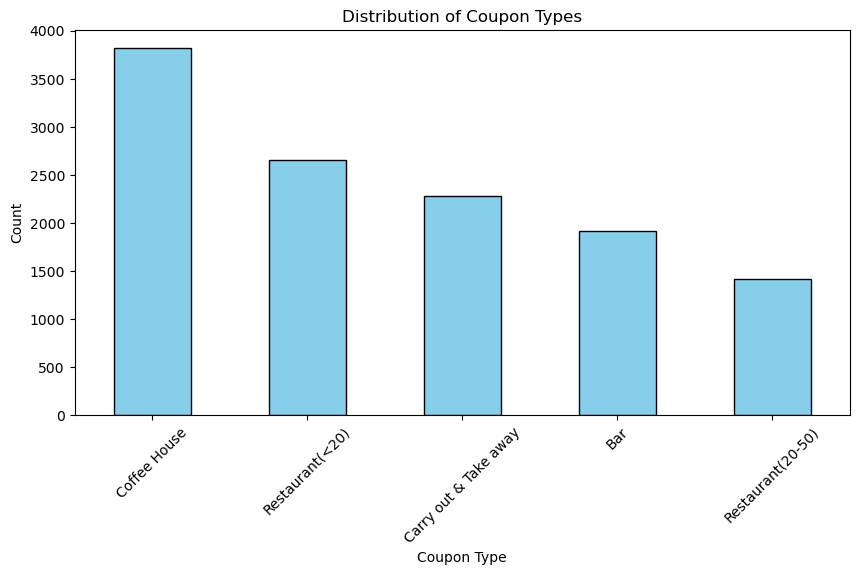

In [21]:
# Count occurrences of each coupon type
coupon_counts = data['coupon'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 5))
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel("Coupon Type") # Add label for x axis
plt.ylabel("Count") # Add label for y axis
plt.title("Distribution of Coupon Types") # Add title for the whole plot
plt.xticks(rotation=45)  # Rotate labels for better readability

# Display the bar chart
plt.show()


6. Use a histogram to visualize the temperature column.

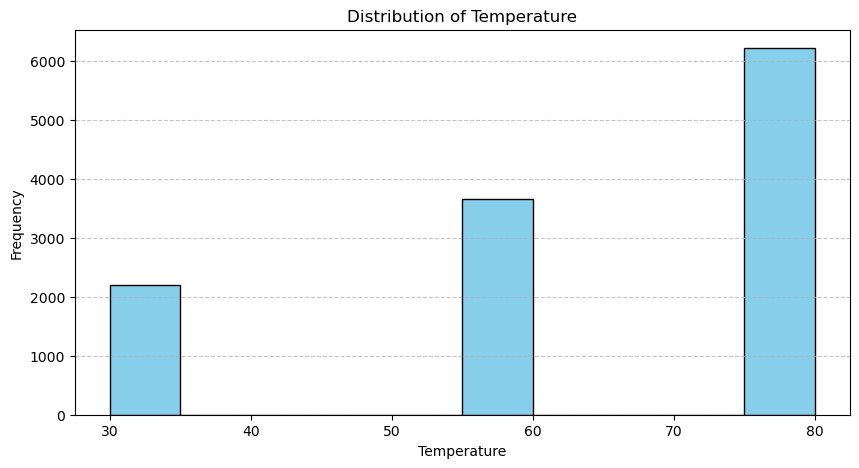

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel("Temperature") # Add label for x axis
plt.ylabel("Frequency") # Add label for y axis
plt.title("Distribution of Temperature") # Add title for the whole plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
# Load your dataset
data = pd.read_csv("C:\Downloads\coupons.csv") 

# Query rows where the coupon column is "Bar"
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons = bar_coupons.dropna(subset=['Bar']) #Drop the null values for bar coupons

# Display the filtered DataFrame
print(bar_coupons)


           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\payam\AppData\Local\Temp\ipykernel_9928\1352915094.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("C:\Downloads\coupons.csv")


2. What proportion of bar coupons were accepted?


In [27]:
yes_to_coupons = (bar_coupons['Y'] == 1).sum()
print('Yes to Bar coupon count ')
print(yes_to_coupons)
print('Proportion of the bar coupons that were accepted ')
print(yes_to_coupons / len(bar_coupons))


# Find the unique values of Bar to be able to use them in 'isin' function below
unique_bar_values = data['Bar'].unique()

# Print the unique values
print(unique_bar_values)


Yes to Bar coupon count 
819
Proportion of the bar coupons that were accepted 
0.4103206412825651
['never' 'less1' '1~3' 'gt8' nan '4~8']


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
bar_visits_3_times_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])].shape[0]
bar_visits_3_times_or_fewer_with_coupon_acceptance = bar_coupons[(bar_coupons['Bar'].isin(['never', 'less1', '1~3'])) & (bar_coupons['Y'] == 1)].shape[0]
print('Acceptance rate of Bar visitors with 3 or less times a month ')
print(bar_visits_3_times_or_fewer_with_coupon_acceptance / bar_visits_3_times_or_fewer)

bar_visits_more_than_3_times = bar_coupons[bar_coupons['Bar'].isin(['gt8', '4~8'])].shape[0]
bar_visits_more_than_3_times_with_coupon_acceptance = bar_coupons[(bar_coupons['Bar'].isin(['gt8', '4~8'])) & (bar_coupons['Y'] == 1)].shape[0]
print('Acceptance rate of Bar visitors with more than 3 times a month ')
print(bar_visits_more_than_3_times_with_coupon_acceptance / bar_visits_more_than_3_times)


Acceptance rate of Bar visitors with 3 or less times a month 
0.37061769616026713
Acceptance rate of Bar visitors with more than 3 times a month 
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [31]:
#Find all the unique ages to be able to use them in the above 25 queries below
unique_age_values = data['age'].unique()

# Print the unique values
print(unique_age_values)

bar_visitors_more_than_once_above_25 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) 
    & (bar_coupons['age'].isin(['46', '26', '31', '41', '50plus', '36']))].shape[0]

bar_visitors_more_than_once_above_25_accepted_coupon = bar_coupons[(bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) 
    & (bar_coupons['age'].isin(['46', '26', '31', '41', '50plus', '36'])) & (bar_coupons['Y'] == 1)].shape[0]
print('Bar visitors who go to bar more than once a month and are over the age of 25')
print(bar_visitors_more_than_once_above_25_accepted_coupon)

print('Acceptance rate of bar visitors above 25 years of age who go to bar more than once a month')
print(bar_visitors_more_than_once_above_25_accepted_coupon/bar_visitors_more_than_once_above_25)

bar_visitors_more_than_once = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])].shape[0]

print('Drivers going to bar more than once a month')
print(bar_visitors_more_than_once)

bar_visitors_more_than_once_accepted_coupon = bar_coupons[(bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) 
    & (bar_coupons['Y'] == 1)].shape[0]

print('Acceptance rate of bar visitors who go to bar more than once a month')
print(bar_visitors_more_than_once_accepted_coupon/bar_visitors_more_than_once)

# The acceptance rates of drivers going to a bar more than once regardless of whether they are over 25 or not are negligible
print('The difference between acceptance rates of drivers going to a bar more than once regardless of whether they are over 25 or not are negligible (i.e. less than 2%)')


['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Bar visitors who go to bar more than once a month and are over the age of 25
292
Acceptance rate of bar visitors above 25 years of age who go to bar more than once a month
0.6952380952380952
Drivers going to bar more than once a month
596
Acceptance rate of bar visitors who go to bar more than once a month
0.6879194630872483
The difference between acceptance rates of drivers going to a bar more than once regardless of whether they are over 25 or not are negligible (i.e. less than 2%)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [33]:
#Find all the unique passengers to be able to find the drivers with kids in the queries below
unique_passenger_values = data['passanger'].unique()

# Print the unique values
print(unique_passenger_values)

#Find all the unique occupations to be able to use them in the queries below
unique_occupation_values = data['occupation'].unique()

# Print the unique values
print(unique_occupation_values)

bar_visitors_more_than_once_no_kid_passengers_not_farming_fishing_forestry = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8']) 
    & (~bar_coupons['passanger'].isin(['Kid(s)'])) & (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))].shape[0]

print('Drivers going to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, and forestry')
print(bar_visitors_more_than_once_no_kid_passengers_not_farming_fishing_forestry)

bar_visitors_more_than_once_no_kid_passengers_not_farming_fishing_forestry_accepted_coupon = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8']) 
    & (~bar_coupons['passanger'].isin(['Kid(s)'])) & (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])) & (bar_coupons['Y'] == 1)].shape[0]

print('Acceptance rate of drivers going to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, and forestry')
print(bar_visitors_more_than_once_no_kid_passengers_not_farming_fishing_forestry_accepted_coupon/
      bar_visitors_more_than_once_no_kid_passengers_not_farming_fishing_forestry)

print('Acceptance rate of drivers who go to bar more than once a month with passengers that were not kid and not having the occupation of farming, fshing, and forestry is higher than the total population of drivers who go to bar more than once')


['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
Drivers going to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, and forestry
551
Acceptance rate of drivers going to bar more than once a month and had passengers that were not a kid and had occupations other than farming

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [35]:
# . Drivers who go to bars more than once a month, had passengers that were not a kid, and were not windowed
bar_visitors_more_than_once_no_kid_passengers_not_windowed = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8']) 
    & (~bar_coupons['passanger'].isin(['Kid(s)'])) & (~bar_coupons['maritalStatus'].isin(['Widowed']))].shape[0]

print('Bar visitors, more than once, no kids, and not windowed')
print(bar_visitors_more_than_once_no_kid_passengers_not_windowed)

bar_visitors_more_than_once_no_kid_passengers_not_windowed_accepted_coupon = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8']) 
    & (~bar_coupons['passanger'].isin(['Kid(s)'])) & (~bar_coupons['maritalStatus'].isin(['Widowed'])) & (bar_coupons['Y'] == 1)].shape[0]

print('Bar visitors, more than once, no kids, not windowed, and accepted coupons')
print(bar_visitors_more_than_once_no_kid_passengers_not_windowed_accepted_coupon)

print('Acceptance rates of drivers, more than once, no kids, and not windowed')
print(bar_visitors_more_than_once_no_kid_passengers_not_windowed_accepted_coupon/bar_visitors_more_than_once_no_kid_passengers_not_windowed)

# . Drivers who go to bars more than once a month and are under the age of 30
bar_visitors_more_than_once_under_age_30 = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8']) 
    & (~bar_coupons['maritalStatus'].isin(['Widowed'])) & (bar_coupons['age'].isin(['21', '26', 'below21']))].shape[0]

print('Bar visitors, more than once and under age of 30')
print(bar_visitors_more_than_once_under_age_30)

bar_visitors_more_than_once_under_age_30_accepted_coupon = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8']) 
    & (~bar_coupons['maritalStatus'].isin(['Widowed'])) & (bar_coupons['age'].isin(['21', '26', 'below21'])) & (bar_coupons['Y'] == 1)].shape[0]

print('Bar visitors, more than once and under age of 30 who accepted coupon')
print(bar_visitors_more_than_once_under_age_30_accepted_coupon)

print('Acceptance rates of drivers, more than once under the age of 30')
print(bar_visitors_more_than_once_under_age_30_accepted_coupon/bar_visitors_more_than_once_under_age_30)

# . Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

#Find all the unique restaurants under 20 to be used in the queries below
unique_restaurant_under_20_values = data['RestaurantLessThan20'].unique()

# Print the unique values
print(unique_restaurant_under_20_values)

#Find all the unique income levels to be used in the queries below
unique_income_values = data['income'].unique()

# Print the unique values
print(unique_income_values)

bar_visitors_cheap_restaurants_more_than_4_times_income_less_than_50K = bar_coupons[bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) 
    & (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))].shape[0]

print('Bar visitors going to cheap restaurants more than 4 times a months with income level less than 50K')
print(bar_visitors_cheap_restaurants_more_than_4_times_income_less_than_50K)

bar_visitors_cheap_restaurants_more_than_4_times_income_less_than_50K_coupon_accepted = bar_coupons[bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) 
    & (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) 
    & (bar_coupons['Y'] == 1)].shape[0]

print('Bar visitors going to cheap restaurants more than 4 times a month with income level less than 50K and accepted coupons')
print(bar_visitors_cheap_restaurants_more_than_4_times_income_less_than_50K_coupon_accepted)

print('Acceptance rates of drivers visiting cheap restaurants more than 4 times a month with income level less than 50K')
print(bar_visitors_cheap_restaurants_more_than_4_times_income_less_than_50K_coupon_accepted/
      bar_visitors_cheap_restaurants_more_than_4_times_income_less_than_50K)


Bar visitors, more than once, no kids, and not windowed
551
Bar visitors, more than once, no kids, not windowed, and accepted coupons
393
Acceptance rates of drivers, more than once, no kids, and not windowed
0.7132486388384754
Bar visitors, more than once and under age of 30
345
Bar visitors, more than once and under age of 30 who accepted coupon
249
Acceptance rates of drivers, more than once under the age of 30
0.7217391304347827
['4~8' '1~3' 'less1' 'gt8' nan 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Bar visitors going to cheap restaurants more than 4 times a months with income level less than 50K
339
Bar visitors going to cheap restaurants more than 4 times a month with income level less than 50K and accepted coupons
155
Acceptance rates of drivers visiting cheap restaurants more than 4 times a month with income level less than 50K
0.457227138643067

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [37]:
# Drivers who accepted the bar coupons have the following characteristics:
#  . They have income levels more than 50K
#  . They are mainly under the age of 30
#  . They do not have kids in their cars
#  . They are not windowed
#  . They do not frequently go to cheap restaurants
print('Drivers who accepted the bar coupons have: income levels more than 50K, mainly under the age of 30, do not have kids in their cars, they are not widowed, and do not frequently go to cheap restaurants')


Drivers who accepted the bar coupons have: income levels more than 50K, mainly under the age of 30, do not have kids in their cars, they are not widowed, and do not frequently go to cheap restaurants


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [39]:
#Find all the unique weather values to be able to use them in the queries below
unique_weather_values = data['weather'].unique()

# Print the unique values
print(unique_weather_values)

#Find all the unique temperature values to be able to use them in the queries below
unique_temperature_values = data['temperature'].unique()

# Print the unique values
print(unique_temperature_values)

bar_visitors_sunny = bar_coupons[(bar_coupons['weather'].isin(['Sunny']))
    & (bar_coupons['Y'] == 1)].shape[0]

print('bar_visitors_sunny')
print(bar_visitors_sunny)

bar_visitors_rainy = bar_coupons[(bar_coupons['weather'].isin(['Rainy']))
    & (bar_coupons['Y'] == 1)].shape[0]

print('bar_visitors_rainy')
print(bar_visitors_rainy)

bar_visitors_snowy = bar_coupons[(bar_coupons['weather'].isin(['Snowy']))
    & (bar_coupons['Y'] == 1)].shape[0]

print('bar_visitors_snowy')
print(bar_visitors_snowy)

bar_coupons['temperature'] = pd.to_numeric(bar_coupons['temperature'])

bar_visitors_temperature_80 = bar_coupons[(bar_coupons['temperature'] == 80)
    & (bar_coupons['Y'] == 1)].shape[0]

print('bar_visitors_temperature_80')
print(bar_visitors_temperature_80)

bar_visitors_temperature_55 = bar_coupons[(bar_coupons['temperature'] == 55)
    & (bar_coupons['Y'] == 1)].shape[0]

print('bar_visitors_temperature_55')
print(bar_visitors_temperature_55)

bar_visitors_temperature_30 = bar_coupons[(bar_coupons['temperature'] == 30)
    & (bar_coupons['Y'] == 1)].shape[0]

print('bar_visitors_temperature_30')
print(bar_visitors_temperature_30)


# Based on the above findings on temperature and weather

# . Weather seems to have significant effect on whether coupon is accepted or not. As you can see snowy days have significantly less acceptance (i.e. 76)
#   rainy has more but significantly less than sunny days (i.e. 156) and sunny has the most number of acceptance (i.e. 587)
#  . Temperature seems to have impacts also on acceptance. When the weather is not too hot or too cold, acceptance has been highest (i.e. on temperature of 55, 425 acceptance)
#    Too cold has the least acceptance (i.e. temperature of 30 has only 138 acceptance) and too hot has much more than too cold but much less than 
#    comfortable temperature (i.e. on temperature 80, 256 acceptance)


['Sunny' 'Rainy' 'Snowy']
[55 80 30]
bar_visitors_sunny
587
bar_visitors_rainy
156
bar_visitors_snowy
76
bar_visitors_temperature_80
256
bar_visitors_temperature_55
425
bar_visitors_temperature_30
138
